<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   


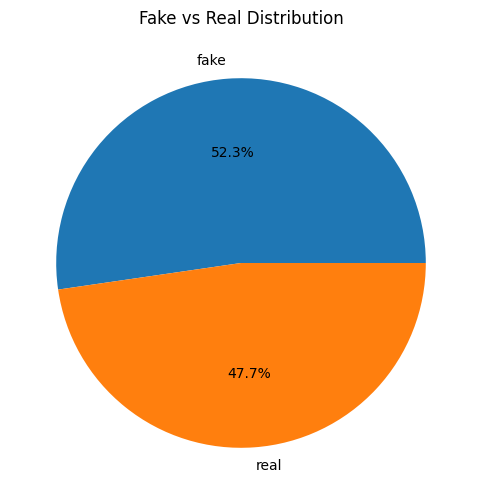

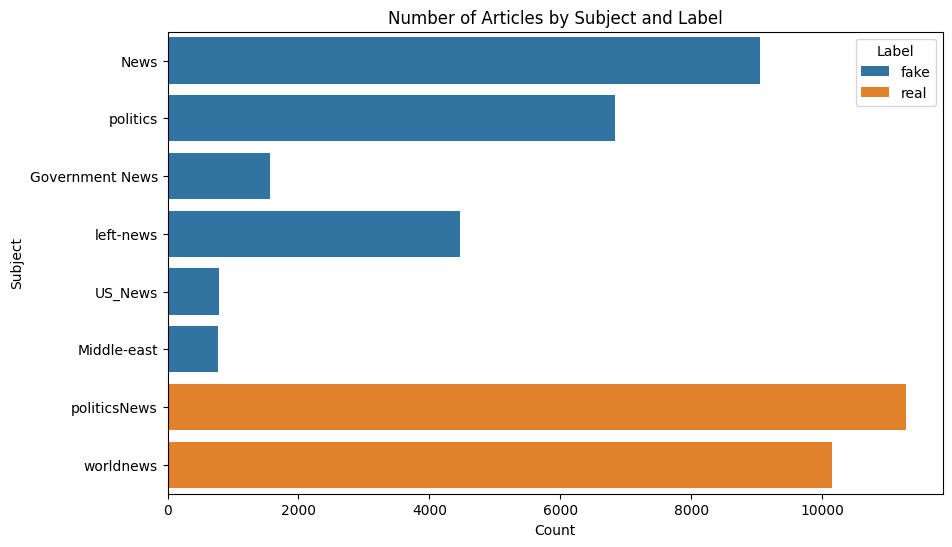

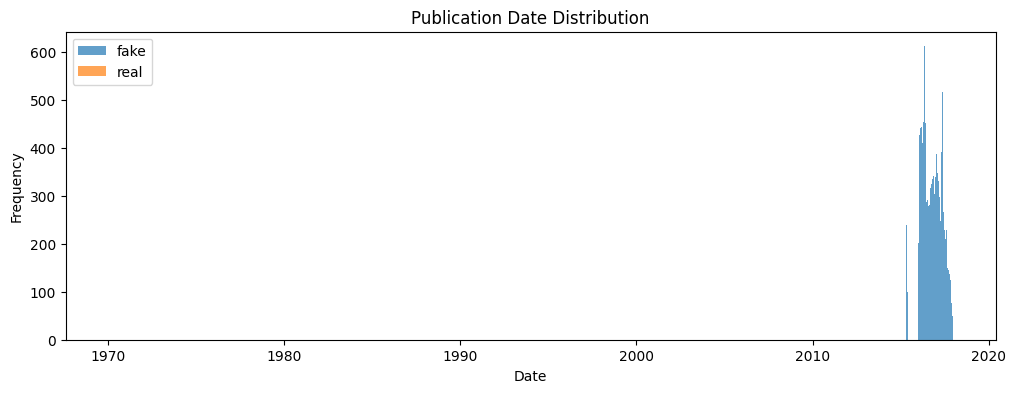

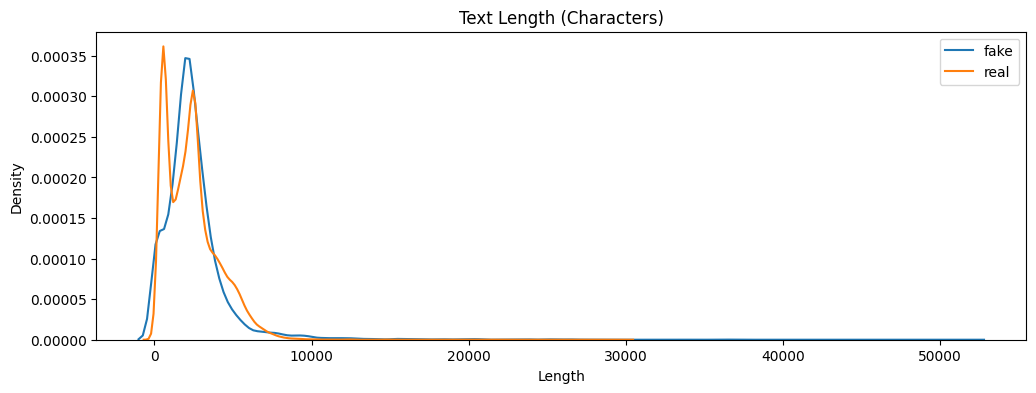

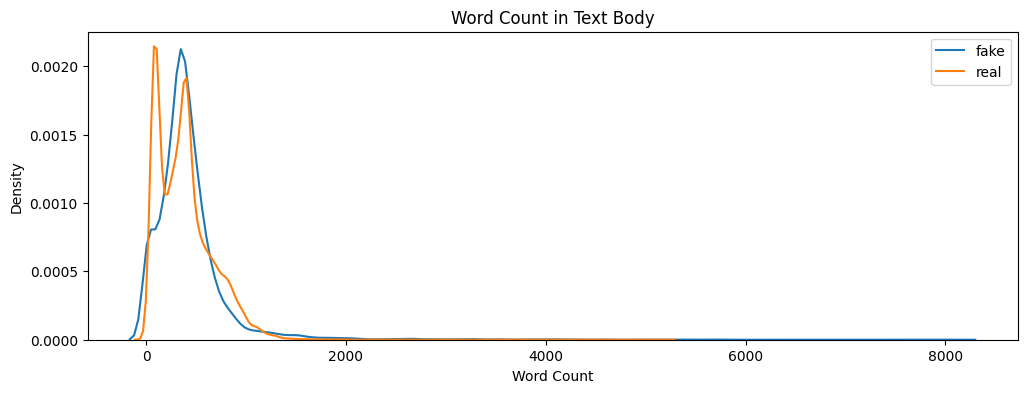

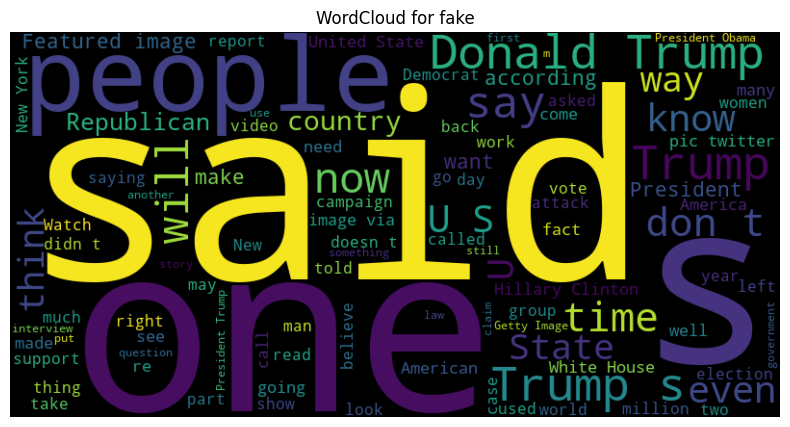

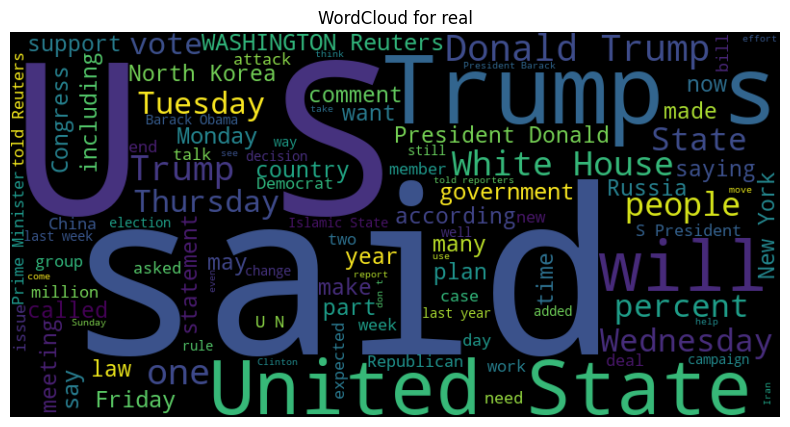

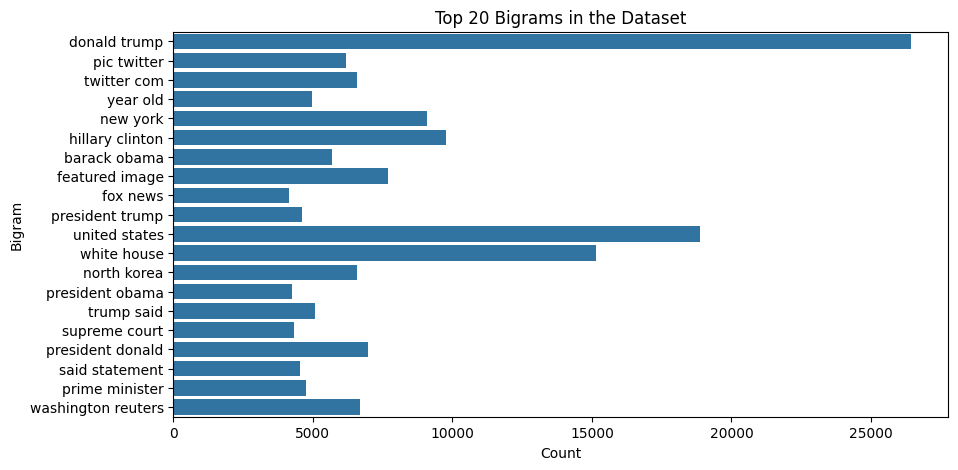

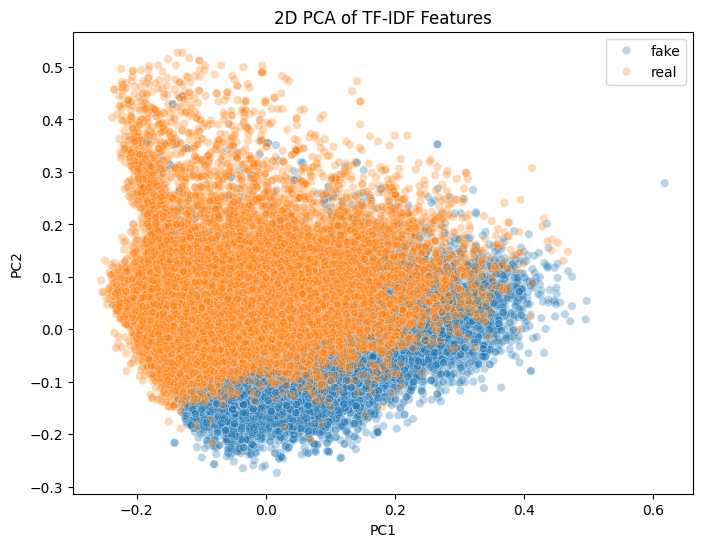

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

# 1. Load data
fake = pd.read_csv('../data/raw/Fake.csv')
true = pd.read_csv('../data/raw/True.csv')
fake['label'] = 'fake'
true['label'] = 'real'
df = pd.concat([fake, true], ignore_index=True)

# 2. Data overview
df.info()
print(df.head())

# 3. Missing values
print(df.isnull().sum())

# 4. Class balance
plt.figure(figsize=(6,6))
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Fake vs Real Distribution')
plt.ylabel('')
plt.show()

# 5. Subject distribution
plt.figure(figsize=(10,6))
sns.countplot(y='subject', hue='label', data=df)
plt.title('Number of Articles by Subject and Label')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.legend(title='Label')
plt.show()

# 6. Publication date distribution
df['date'] = pd.to_datetime(df['date'], errors='coerce')
plt.figure(figsize=(12,4))
plt.hist(df[df['label']=='fake']['date'].dropna(), bins=50, alpha=0.7, label='fake')
plt.hist(df[df['label']=='real']['date'].dropna(), bins=50, alpha=0.7, label='real')
plt.title('Publication Date Distribution')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 7. Text and title length analysis
df['text_length'] = df['text'].str.len()
df['title_length'] = df['title'].str.len()
plt.figure(figsize=(12,4))
sns.kdeplot(df[df['label']=='fake']['text_length'], label='fake')
sns.kdeplot(df[df['label']=='real']['text_length'], label='real')
plt.title('Text Length (Characters)')
plt.xlabel('Length')
plt.legend()
plt.show()

# 8. Word count analysis
df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12,4))
sns.kdeplot(df[df['label']=='fake']['text_word_count'], label='fake')
sns.kdeplot(df[df['label']=='real']['text_word_count'], label='real')
plt.title('Word Count in Text Body')
plt.xlabel('Word Count')
plt.legend()
plt.show()

# 9. WordCloud for each class
for label in ['fake', 'real']:
    text = ' '.join(df[df['label']==label]['text'].dropna().values)
    wc = WordCloud(stopwords=STOPWORDS, max_words=100, width=800, height=400)
    plt.figure(figsize=(10,5))
    plt.imshow(wc.generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label}')
    plt.show()

# 10. Frequent n-grams
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
X2 = vectorizer.fit_transform(df['text'].fillna(''))
sum_words = X2.sum(axis=0)
ngrams = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
grams = sorted(ngrams, key=lambda x: x[1], reverse=True)
ng_df = pd.DataFrame(ngrams, columns=['ngram', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='count', y='ngram', data=ng_df)
plt.title('Top 20 Bigrams in the Dataset')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

# 11. PCA on TF-IDF features
tfidf = TfidfVectorizer(stop_words='english', max_features=2000)
X = tfidf.fit_transform(df['text'].fillna(''))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = df['label'].values
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, alpha=0.3)
plt.title('2D PCA of TF-IDF Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
